In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [10]:
df = pd.read_csv("../Data/IMDB Dataset.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


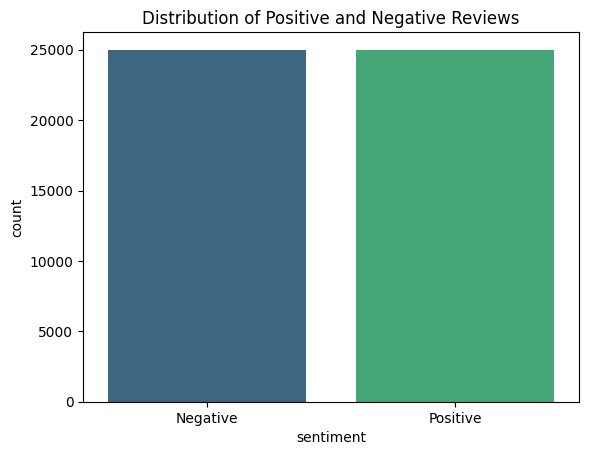

In [11]:
# Analyze the number of positive and negative reviews
# Make sure the 'sentiment' column contains 'positive' or 'negative' for this code
# Otherwise, you'll need to adjust the conversion or label names
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Distribution of Positive and Negative Reviews')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()


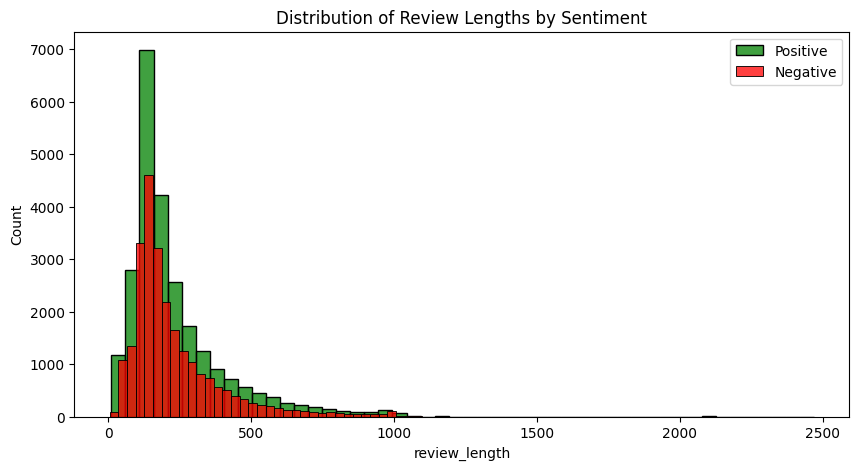

             count       mean         std   min    25%    50%    75%     max
sentiment                                                                   
negative   25000.0  229.46456  164.947795   4.0  128.0  174.0  278.0  1522.0
positive   25000.0  232.84932  177.497046  10.0  125.0  172.0  284.0  2470.0


In [13]:
# Review length
df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 5))
sns.histplot(df[df['sentiment'] == 'positive']['review_length'], bins=50, color='green', label='Positive')
sns.histplot(df[df['sentiment'] == 'negative']['review_length'], bins=50, color='red', label='Negative')
plt.legend()
plt.title('Distribution of Review Lengths by Sentiment')
plt.show()

# Length statistics
print(df.groupby('sentiment')['review_length'].describe())

C:\Users\antoi\AppData\Local\Temp\ipykernel_13724\506883147.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(words)
C:\Users\antoi\AppData\Local\Temp\ipykernel_13724\506883147.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(words)


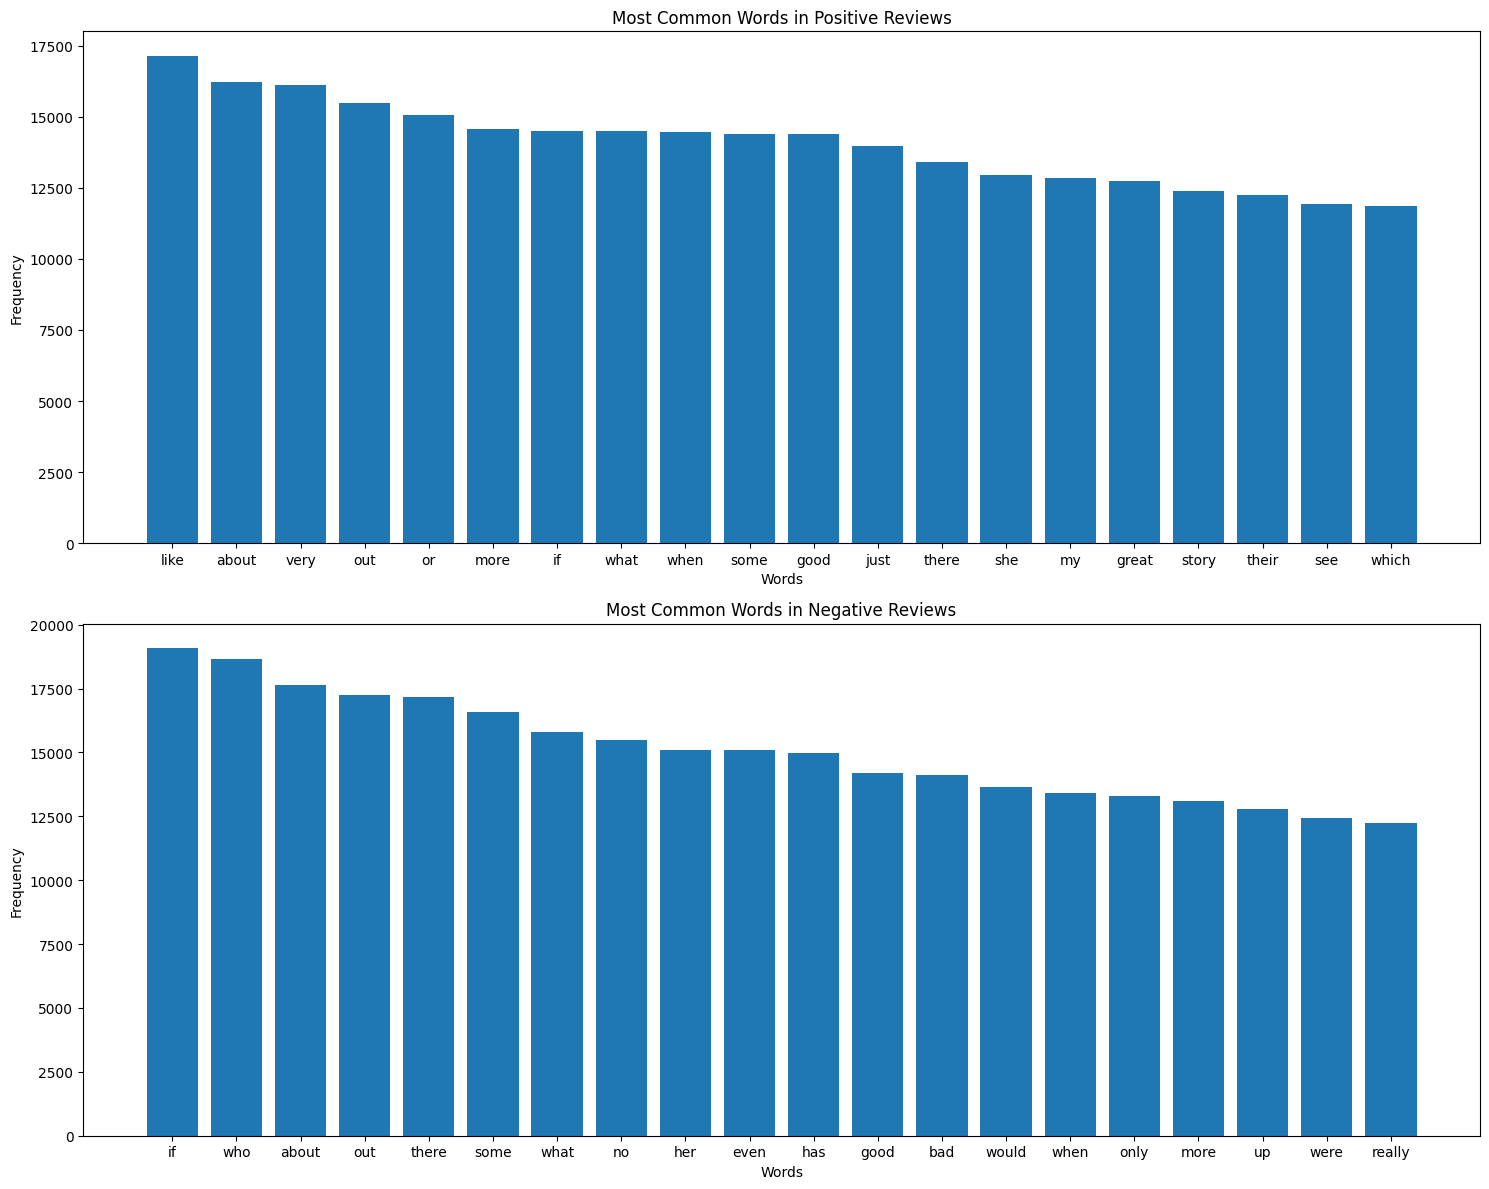

In [36]:
import matplotlib.pyplot as plt
from collections import Counter
import re

# Function to clean text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text

# Cleaning and counting words
all_words = ' '.join(df[df['sentiment'] == 'positive']['review'].apply(clean_text)).split()
positive_words = Counter(all_words)

all_words = ' '.join(df[df['sentiment'] == 'negative']['review'].apply(clean_text)).split()
negative_words = Counter(all_words)

# Function to plot word frequencies
def plot_word_frequency(word_counts, title, ax):
    # Select words from 40 to 59 most common
    common_words = word_counts.most_common()[39:59]
    words, counts = zip(*common_words)
    
    # Create bar plot
    ax.bar(words, counts)
    ax.set_title(title)
    ax.set_xlabel('Words')
    ax.set_ylabel('Frequency')
    ax.set_xticklabels(words) 

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plotting positive words
plot_word_frequency(positive_words, 'Most Common Words in Positive Reviews', ax1)

# Plotting negative words
plot_word_frequency(negative_words, 'Most Common Words in Negative Reviews', ax2)

plt.tight_layout()
plt.show()

In [32]:
from nltk import ngrams
from itertools import chain

def get_ngrams(text, n):
    return list(ngrams(text.split(), n))

# Example for trigrams
positive_trigrams = df[df['sentiment'] == 'positive']['review'].apply(lambda x: get_ngrams(x, 3))
negative_trigrams = df[df['sentiment'] == 'negative']['review'].apply(lambda x: get_ngrams(x, 3))

# Counting trigrams
positive_trigram_counts = Counter(chain(*positive_trigrams))
negative_trigram_counts = Counter(chain(*negative_trigrams))

# Display trigrams from position 40 to 59 for each sentiment
print("Trigrams from position 40 to 59 for positive reviews:", positive_trigram_counts.most_common()[39:59])
print("Trigrams from position 40 to 59 for negative reviews:", negative_trigram_counts.most_common()[39:59])

Trigrams from position 40 to 59 for positive reviews: [(('in', 'the', 'movie'), 650), (('but', 'it', 'is'), 638), (('in', 'this', 'film'), 632), (('one', 'of', 'those'), 626), (('there', 'is', 'a'), 623), (('in', 'this', 'movie'), 619), (('the', 'story', 'of'), 617), (('I', 'saw', 'this'), 615), (('I', 'have', 'seen'), 612), (('to', 'see', 'the'), 580), (('I', 'have', 'to'), 575), (('seems', 'to', 'be'), 569), (('is', 'not', 'a'), 565), (('to', 'be', 'the'), 558), (('would', 'have', 'been'), 556), (('all', 'of', 'the'), 554), (('!', '!', '!'), 554), (('that', 'it', 'is'), 550), (('in', 'order', 'to'), 550), (('This', 'film', 'is'), 542)]
Trigrams from position 40 to 59 for negative reviews: [(('of', 'the', 'most'), 737), (('it', 'was', 'a'), 732), (('have', 'been', 'a'), 721), (('one', 'of', 'those'), 695), (('of', 'this', 'movie'), 684), (('the', 'movie', 'was'), 666), (('This', 'is', 'a'), 663), (('at', 'the', 'end'), 660), (('in', 'this', 'film'), 633), (('that', 'it', 'was'), 615),